In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation, Normalization

In [59]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [60]:
X_train.shape

(60000, 28, 28)

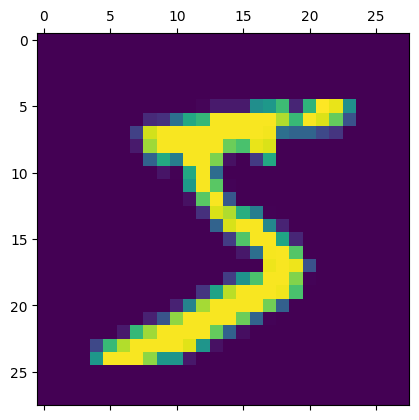

In [61]:
plt.matshow(X_train[0])

In [62]:
model = Sequential([
    Flatten(input_shape=[28, 28]),
    Normalization(),
    Dense(100, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='Adamax',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [63]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 4.7758 - accuracy: 0.8527
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.1948 - accuracy: 0.9173
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6394 - accuracy: 0.9319
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4368 - accuracy: 0.9439
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3078 - accuracy: 0.9519


In [64]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5963 - accuracy: 0.9332


[0.5962615013122559, 0.9332000017166138]

In [65]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

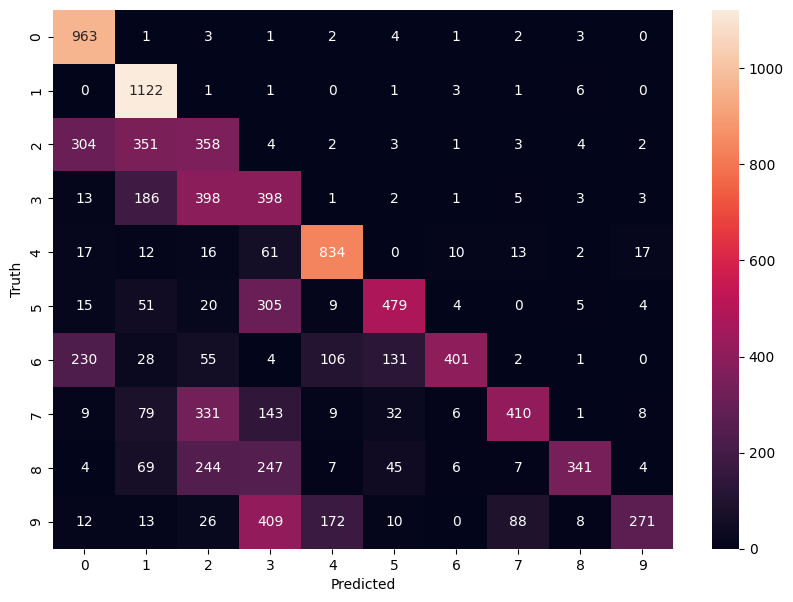

In [66]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')